#### Handling Imbalanced DataSets - Customer Churn Prediction

When dealing with customer churn prediction, it is common to encounter imbalanced datasets where the number of customers who churn (leave) is significantly lower than those who stay. This imbalance can lead to biased models that perform poorly on the minority class (churned customers). In previous model prediction, f1 score for churned customers was low due to this imbalance.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Data Loading, Preprocessing (Same as previous file)
df = pd.read_csv('customer_churn.csv')
df.drop(['customerID'], axis=1, inplace=True) # Dropping irrelevant column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df[df['TotalCharges'].notnull()]
df.replace('No phone service', 'No', inplace=True)

replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in replace_cols:
    df[col].replace({'No internet service': 'No'}, inplace=True)
df.replace({'No': 0, 'Yes': 1}, inplace=True)
df['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

label_cols = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(data=df, columns=label_cols)

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [3]:
from sklearn.model_selection import train_test_split

def split_data(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

def print_report(y_test, y_pred):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    

# Model Function
def ANN(x_train, x_test, y_train, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(20, input_dim=x_train.shape[1], activation='relu'),
        keras.layers.Dense(12, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_test, y_test))
    else:
        model.fit(x_train, y_train, epochs=100, batch_size=10, class_weight=weights, validation_data=(x_test, y_test))

    print(model.evaluate(x_test, y_test))
    y_pred = (model.predict(x_test) > 0.5).astype("int32")
    return y_pred
    

Epoch 1/100
563/563 [==============================] - 2s 4ms/step - loss: 0.4729 - accuracy: 0.7614 - val_loss: 0.4465 - val_accuracy: 0.7811
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 0.4249 - accuracy: 0.7966 - val_loss: 0.4415 - val_accuracy: 0.7825
Epoch 3/100
563/563 [==============================] - 3s 4ms/step - loss: 0.4198 - accuracy: 0.7989 - val_loss: 0.4404 - val_accuracy: 0.7939
Epoch 4/100
563/563 [==============================] - 2s 4ms/step - loss: 0.4181 - accuracy: 0.8016 - val_loss: 0.4415 - val_accuracy: 0.7918
Epoch 5/100
563/563 [==============================] - 2s 4ms/step - loss: 0.4150 - accuracy: 0.8025 - val_loss: 0.4367 - val_accuracy: 0.7854
Epoch 6/100
563/563 [==============================] - 2s 4ms/step - loss: 0.4118 - accuracy: 0.8057 - val_loss: 0.4368 - val_accuracy: 0.7896
Epoch 7/100
563/563 [==============================] - 2s 4ms/step - loss: 0.4103 - accuracy: 0.8062 - val_loss: 0.4356 - val_accuracy: 0.7889

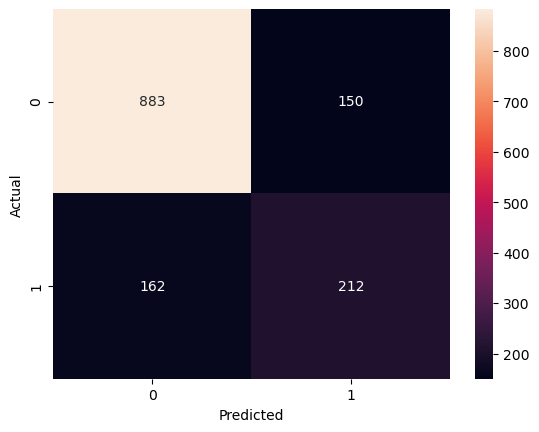

In [4]:
x_train, x_test, y_train, y_test = split_data(df.drop('Churn', axis=1), df['Churn'])
y_preds = ANN(x_train, x_test, y_train, y_test, 'binary_crossentropy', -1)
print_report(y_test, y_preds)

#### Handling Imbalanced Dataset

In [5]:
count_class_0, count_class_1 = df['Churn'].value_counts()
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]
count_class_0, count_class_1

(5163, 1869)

Method1: Under Sampling - Reducing the number of instances in the majority class to match the minority class.

In [6]:
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under =pd.concat([df_class_0_under, df_class_1], axis=0)
x_under = df_train_under.drop('Churn', axis=1)
y_under = df_train_under['Churn']

Epoch 1/100
299/299 [==============================] - 1s 4ms/step - loss: 0.5772 - accuracy: 0.7070 - val_loss: 0.5094 - val_accuracy: 0.7553
Epoch 2/100
299/299 [==============================] - 1s 4ms/step - loss: 0.4968 - accuracy: 0.7632 - val_loss: 0.4865 - val_accuracy: 0.7647
Epoch 3/100
299/299 [==============================] - 1s 4ms/step - loss: 0.4855 - accuracy: 0.7686 - val_loss: 0.4835 - val_accuracy: 0.7674
Epoch 4/100
299/299 [==============================] - 1s 4ms/step - loss: 0.4822 - accuracy: 0.7746 - val_loss: 0.4754 - val_accuracy: 0.7701
Epoch 5/100
299/299 [==============================] - 1s 3ms/step - loss: 0.4784 - accuracy: 0.7742 - val_loss: 0.4749 - val_accuracy: 0.7727
Epoch 6/100
299/299 [==============================] - 1s 3ms/step - loss: 0.4772 - accuracy: 0.7709 - val_loss: 0.4715 - val_accuracy: 0.7701
Epoch 7/100
299/299 [==============================] - 1s 4ms/step - loss: 0.4768 - accuracy: 0.7732 - val_loss: 0.4685 - val_accuracy: 0.7714

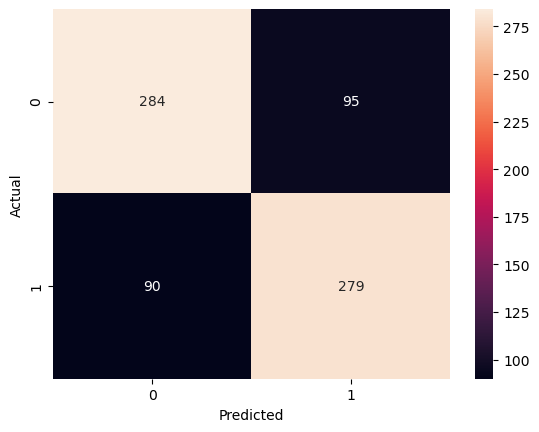

In [7]:
x_train_under, x_test_under, y_train_under, y_test_under = split_data(x_under, y_under)
y_preds_under = ANN(x_train_under, x_test_under, y_train_under, y_test_under, 'binary_crossentropy', -1)
print_report(y_test_under, y_preds_under)

Method2: Over Sampling - Increasing the number of instances in the minority class by duplicating existing instances.

In [8]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)
x_over = df_train_over.drop('Churn', axis=1)
y_over = df_train_over['Churn']

Epoch 1/100
826/826 [==============================] - 3s 3ms/step - loss: 0.5334 - accuracy: 0.7363 - val_loss: 0.4952 - val_accuracy: 0.7473
Epoch 2/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4886 - accuracy: 0.7623 - val_loss: 0.4859 - val_accuracy: 0.7590
Epoch 3/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4814 - accuracy: 0.7643 - val_loss: 0.4895 - val_accuracy: 0.7498
Epoch 4/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4782 - accuracy: 0.7659 - val_loss: 0.4797 - val_accuracy: 0.7619
Epoch 5/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4747 - accuracy: 0.7689 - val_loss: 0.4810 - val_accuracy: 0.7643
Epoch 6/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4715 - accuracy: 0.7717 - val_loss: 0.4838 - val_accuracy: 0.7609
Epoch 7/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4691 - accuracy: 0.7722 - val_loss: 0.4786 - val_accuracy: 0.7706

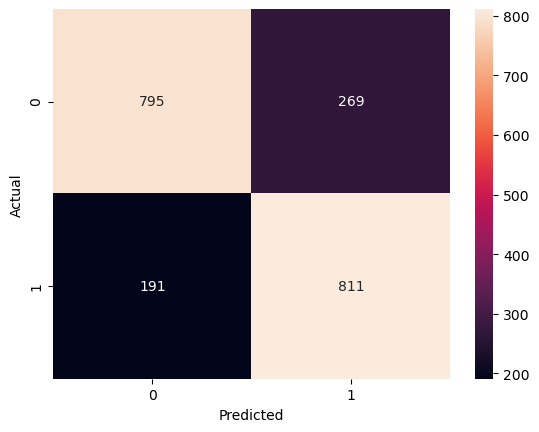

In [9]:
x_train_over, x_test_over, y_train_over, y_test_over = split_data(x_over, y_over)
y_preds_over = ANN(x_train_over, x_test_over, y_train_over, y_test_over, 'binary_crossentropy', -1)
print_report(y_test_over, y_preds_over)

Method3: SMOTE - Synthetic Minority Over-sampling Technique, which generates synthetic samples for the minority class.

In [10]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(df.drop('Churn', axis=1), df['Churn'])
x_sm.shape, y_sm.shape

((10326, 26), (10326,))

Epoch 1/100
826/826 [==============================] - 3s 3ms/step - loss: 0.5203 - accuracy: 0.7426 - val_loss: 0.4896 - val_accuracy: 0.7662
Epoch 2/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4637 - accuracy: 0.7775 - val_loss: 0.4784 - val_accuracy: 0.7735
Epoch 3/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4537 - accuracy: 0.7843 - val_loss: 0.4698 - val_accuracy: 0.7783
Epoch 4/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4477 - accuracy: 0.7892 - val_loss: 0.4682 - val_accuracy: 0.7812
Epoch 5/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4432 - accuracy: 0.7927 - val_loss: 0.4629 - val_accuracy: 0.7865
Epoch 6/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4374 - accuracy: 0.7961 - val_loss: 0.4633 - val_accuracy: 0.7803
Epoch 7/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4334 - accuracy: 0.7987 - val_loss: 0.4602 - val_accuracy: 0.7793

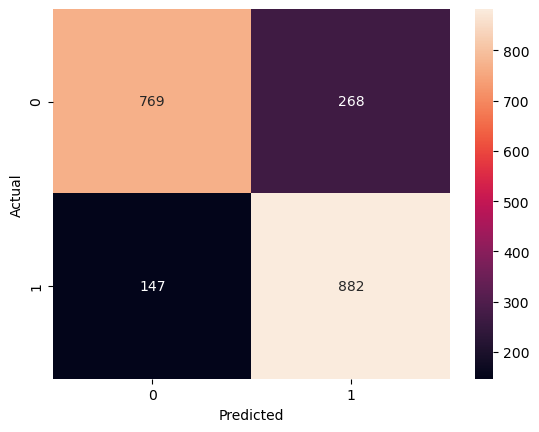

In [11]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = split_data(x_sm, y_sm)
y_pred_smote = ANN(x_train_sm, x_test_sm, y_train_sm, y_test_sm, 'binary_crossentropy', -1)
print_report(y_test_sm, y_pred_smote)

Method4: Ensemble with Undersampling

Training model 1
Epoch 1/100
337/337 [==============================] - 2s 5ms/step - loss: 0.5574 - accuracy: 0.7179 - val_loss: 0.5726 - val_accuracy: 0.7100
Epoch 2/100
337/337 [==============================] - 2s 5ms/step - loss: 0.4937 - accuracy: 0.7705 - val_loss: 0.5274 - val_accuracy: 0.7342
Epoch 3/100
337/337 [==============================] - 2s 5ms/step - loss: 0.4835 - accuracy: 0.7693 - val_loss: 0.5550 - val_accuracy: 0.7186
Epoch 4/100
337/337 [==============================] - 1s 4ms/step - loss: 0.4776 - accuracy: 0.7732 - val_loss: 0.5462 - val_accuracy: 0.7221
Epoch 5/100
337/337 [==============================] - 2s 4ms/step - loss: 0.4743 - accuracy: 0.7741 - val_loss: 0.5236 - val_accuracy: 0.7335
Epoch 6/100
337/337 [==============================] - 2s 5ms/step - loss: 0.4701 - accuracy: 0.7738 - val_loss: 0.5682 - val_accuracy: 0.7178
Epoch 7/100
337/337 [==============================] - 2s 5ms/step - loss: 0.4686 - accuracy: 0.7782 - val_loss: 0.5198 - val

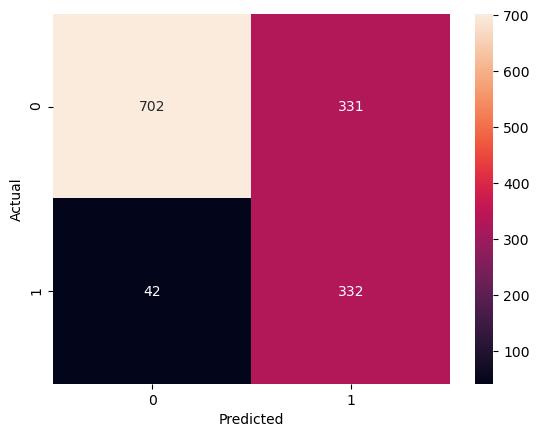

In [13]:
x_train_ens, x_test_ens, y_train_ens, y_test_ens = split_data(df.drop('Churn', axis=1), df['Churn'])
# 4130 - 1495
indexRange = [
    [0, 1495],
    [1495, 2990],
    [2990, 4130],
]
res_holder = [[],[],[]]
for i in range(len(indexRange)):
    print(f"Training model {i+1}")
    df_train = pd.concat([df_class_0[indexRange[i][0]:indexRange[i][1]], df_class_1], axis=0)
    x_ens = df_train.drop('Churn', axis=1)
    y_ens = df_train['Churn']
    y_pred = ANN(x_ens, x_test_ens, y_ens, y_test_ens, 'binary_crossentropy', -1)
    res_holder[i] = y_pred

y_ens_final = np.zeros_like(res_holder[0])
# Combining and taking average
print("Ensemble Results...")
for i in range(len(res_holder[0])):
    y_pred_sum = res_holder[0][i] + res_holder[1][i] + res_holder[2][i]
    if y_pred_sum >= 2:
        y_ens_final[i] = 1
    else:
        y_ens_final[i] = 0
        
print_report(y_test_ens, y_ens_final)